<a href="https://colab.research.google.com/github/AzraSaf/NutriSense/blob/Ayyub/ayyub_work/DSGP%20-%20Deficiency%20Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Image Counts per Class:
{'boron': 100, 'potassium': 191, 'calcium': 383}

Image Dimensions Summary:
boron: [(255, 255), (255, 255), (255, 255), (255, 255), (255, 255)] ... (100 images analyzed)
potassium: [(255, 255), (255, 255), (255, 255), (255, 255), (255, 255)] ... (191 images analyzed)
calcium: [(255, 255), (255, 255), (255, 255), (255, 255), (255, 255)] ... (383 images analyzed)

Blurriness and Brightness Summary:
boron - Avg Blurriness: 290.83, Avg Brightness: 54.15
potassium - Avg Blurriness: 456.64, Avg Brightness: 97.19
calcium - Avg Blurriness: 276.15, Avg Brightness: 90.51
Pixel Intensity Histogram for boron:


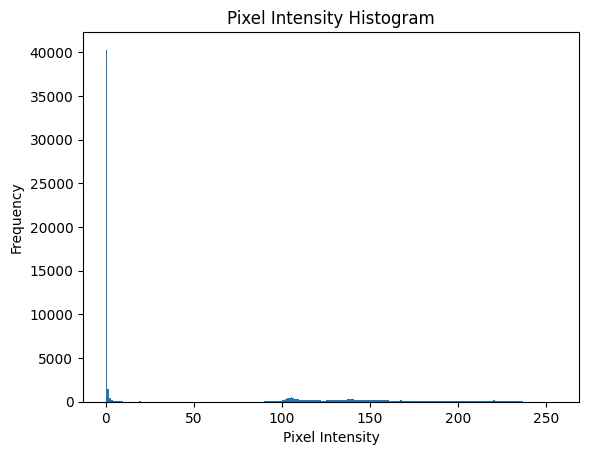

Pixel Intensity Histogram for potassium:


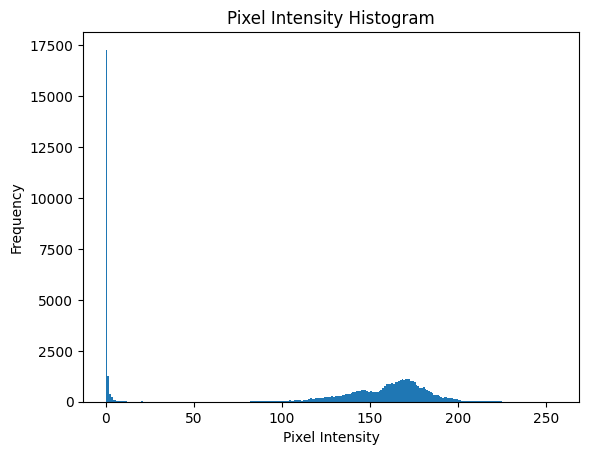

Pixel Intensity Histogram for calcium:


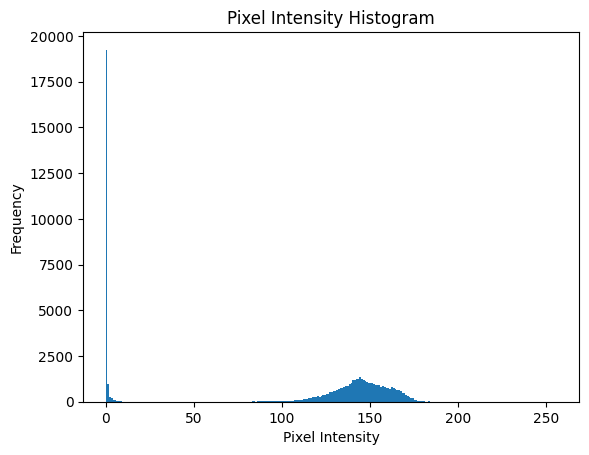

Random Samples from boron:


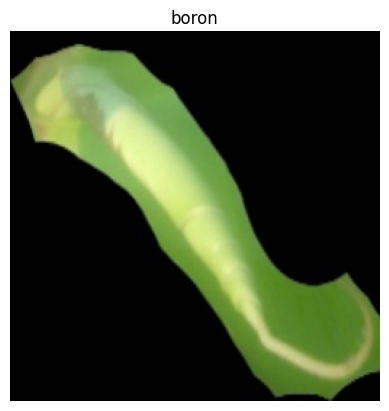

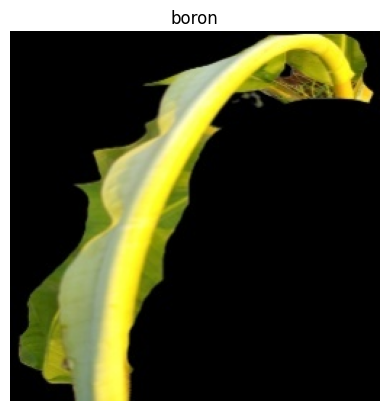

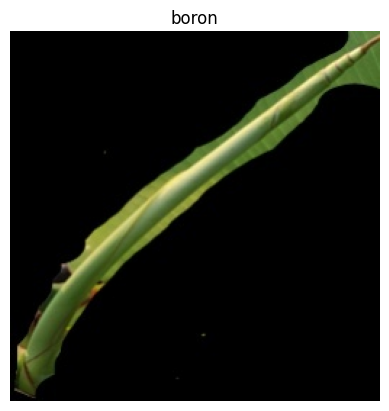

Random Samples from potassium:


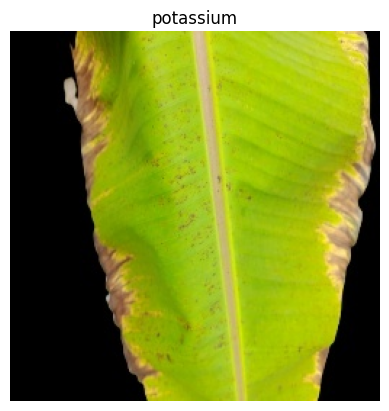

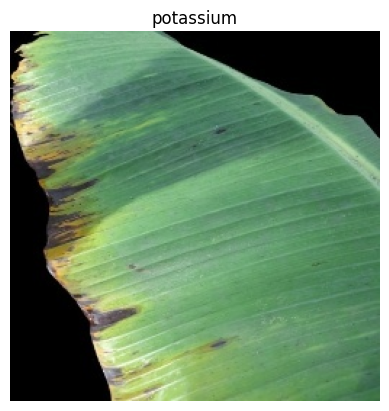

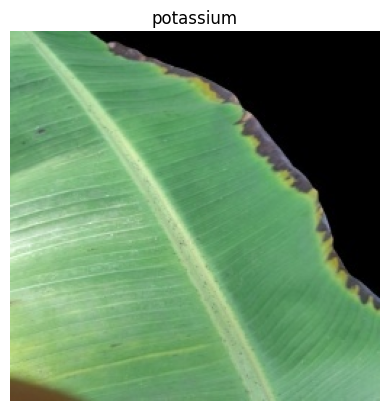

Random Samples from calcium:


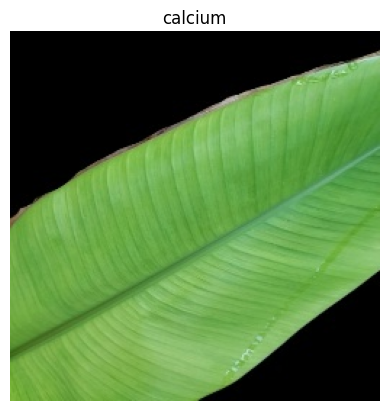

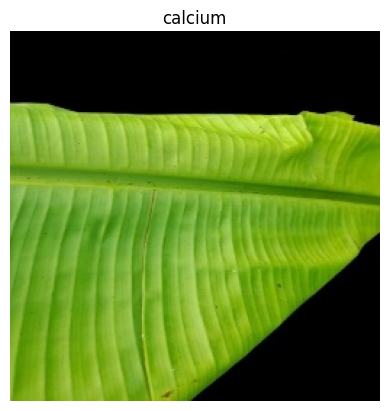

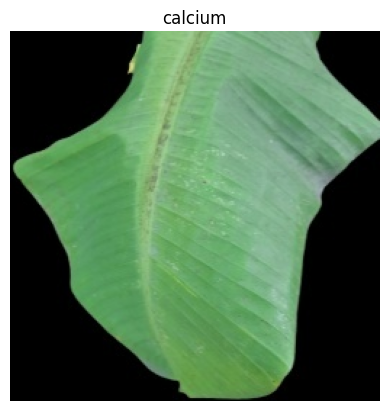

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to dataset
dataset_path = '/content/drive/My Drive/Nutrient Deficient RAW Images of Banana Leaves/'
classes = ['boron', 'potassium', 'calcium']

# Step 1: Load and Filter Dataset
selected_classes = {cls: os.path.join(dataset_path, cls) for cls in classes}

# Step 2: Count Images per Class
image_counts = {}
for cls, path in selected_classes.items():
    image_counts[cls] = len([img for img in os.listdir(path) if img.lower().endswith(('jpg', 'jpeg', 'png'))])

print("Image Counts per Class:")
print(image_counts)

# Step 3: Analyze Image Dimensions and Properties
def analyze_image_properties(image_path):
    image = cv2.imread(image_path)
    dimensions = image.shape[:2]  # Height, Width
    color_channels = image.shape[2] if len(image.shape) > 2 else 1
    return dimensions, color_channels

dimensions_summary = {cls: [] for cls in classes}
color_channels_summary = {cls: [] for cls in classes}

for cls, path in selected_classes.items():
    for img_name in os.listdir(path):
        if img_name.lower().endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(path, img_name)
            dimensions, color_channels = analyze_image_properties(img_path)
            dimensions_summary[cls].append(dimensions)
            color_channels_summary[cls].append(color_channels)

print("\nImage Dimensions Summary:")
for cls, dims in dimensions_summary.items():
    print(f"{cls}: {dims[:5]} ... ({len(dims)} images analyzed)")

# Step 4: Image Quality Analysis
def assess_blurriness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    variance = cv2.Laplacian(image, cv2.CV_64F).var()
    return variance

def assess_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mean_brightness = np.mean(image)
    return mean_brightness

blurriness_summary = {cls: [] for cls in classes}
brightness_summary = {cls: [] for cls in classes}

for cls, path in selected_classes.items():
    for img_name in os.listdir(path):
        if img_name.lower().endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(path, img_name)
            blurriness_summary[cls].append(assess_blurriness(img_path))
            brightness_summary[cls].append(assess_brightness(img_path))

print("\nBlurriness and Brightness Summary:")
for cls in classes:
    print(f"{cls} - Avg Blurriness: {np.mean(blurriness_summary[cls]):.2f}, Avg Brightness: {np.mean(brightness_summary[cls]):.2f}")

# Step 5: Pixel Intensity Distribution
def plot_pixel_intensity_histogram(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.hist(image.ravel(), bins=256, range=(0, 256))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Histogram')
    plt.show()

for cls, path in selected_classes.items():
    print(f"Pixel Intensity Histogram for {cls}:")
    sample_image_path = os.path.join(path, os.listdir(path)[0])
    plot_pixel_intensity_histogram(sample_image_path)

# Step 6: Sample Visualizations
for cls, path in selected_classes.items():
    print(f"Random Samples from {cls}:")
    sample_images = [os.path.join(path, img) for img in os.listdir(path) if img.lower().endswith(('jpg', 'jpeg', 'png'))][:3]
    for img_path in sample_images:
        image = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(cls)
        plt.show()


Mounted at /content/drive
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 674 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5070 - loss: 2.0592 - val_accuracy: 0.8264 - val_loss: 0.4584
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8637 - loss: 0.4080 - val_accuracy: 0.8430 - val_loss: 0.4773
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8770 - loss: 0.2652 - val_accuracy: 0.8595 - val_loss: 0.4004
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9357 - loss: 0.1869 - val_accuracy: 0.8264 - val_loss: 0.4798
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9498 - loss: 0.1505 - val_accuracy: 0.8760 - val_loss: 0.3920
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9671 - loss: 0.1094 - val_accuracy: 0.8760 - val_loss: 0.3441
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9764 - loss: 0.0891 - val_accuracy: 0.8843 - val_loss: 0.3339
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9930 - loss: 0.0546 - val_accuracy: 0.8678 - val_loss: 0.

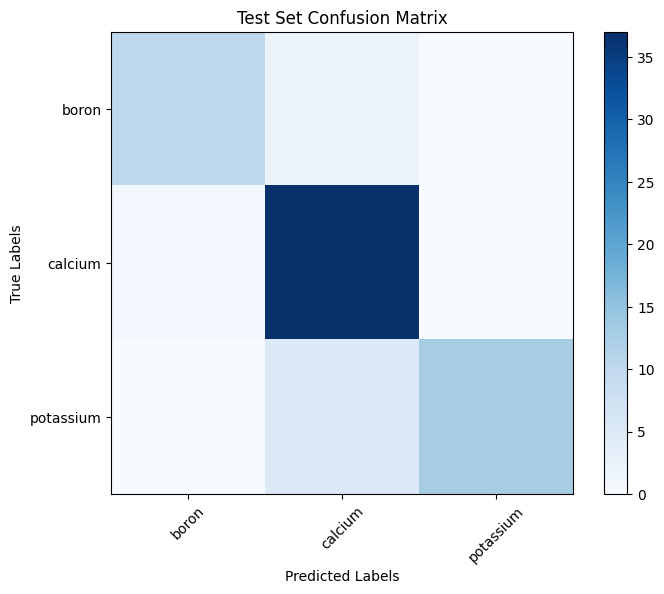

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Validation Set Classification Report:
              precision    recall  f1-score   support

       boron       0.89      0.71      0.79        24
     calcium       0.78      1.00      0.88        62
   potassium       0.96      0.63      0.76        35

    accuracy                           0.83       121
   macro avg       0.88      0.78      0.81       121
weighted avg       0.86      0.83      0.83       121



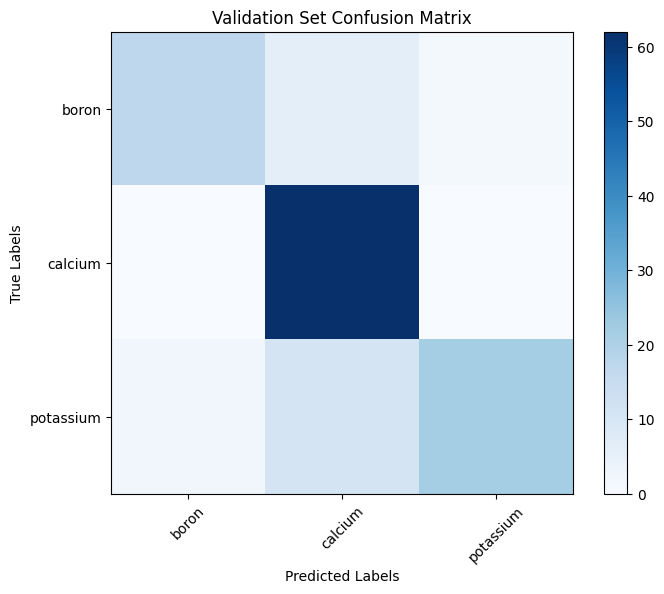

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive

import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/Nutrient Deficient RAW Images of Banana Leaves/'

deficiency_classes = ['boron', 'calcium', 'potassium']

# Image parameters
img_size = (224, 224)

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    width_shift_range=0.2,    # Horizontal shifts
    height_shift_range=0.2,   # Vertical shifts
    brightness_range=[0.8, 1.2],  # Adjust brightness
)

data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    shuffle=False
)

def extract_features(generator):
    features, labels = [], []
    for batch_images, batch_labels in generator:
        feature_batch = model.predict(batch_images)
        features.append(feature_batch)
        labels.append(batch_labels)
        if generator.batch_index == len(generator) - 1:
            break
    return np.vstack(features), np.vstack(labels)

features, labels = extract_features(data_generator)

# Split into train (70%), validation (20%), and test (10%)
X_temp, X_test, y_temp, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

classifier = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(len(deficiency_classes), activation='softmax')
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Validation Accuracy
val_loss, val_accuracy = classifier.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Test Accuracy
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Test Set Classification Report and Confusion Matrix
y_test_pred = classifier.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

print("\nTest Set Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=deficiency_classes))

conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(deficiency_classes)), deficiency_classes, rotation=45)
plt.yticks(np.arange(len(deficiency_classes)), deficiency_classes)
plt.show()

# Validation Set Classification Report
y_val_pred = classifier.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

print("\nValidation Set Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=deficiency_classes))

# Validation Set Confusion Matrix
val_conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(val_conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Validation Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(deficiency_classes)), deficiency_classes, rotation=45)
plt.yticks(np.arange(len(deficiency_classes)), deficiency_classes)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 734 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Found 734 images belonging to 3 classe

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4999 - loss: 2.1898 - val_accuracy: 0.7324 - val_loss: 0.5553
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7521 - loss: 0.5685 - val_accuracy: 0.7606 - val_loss: 0.5100
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8098 - loss: 0.4523 - val_accuracy: 0.8451 - val_loss: 0.4077
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8177 - loss: 0.4221 - val_accuracy: 0.8169 - val_loss: 0.4421
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8550 - loss: 0.3806 - val_accuracy: 0.7887 - val_loss: 0.4442
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8508 - loss: 0.3626 - val_accuracy: 0.8592 - val_loss: 0.3773
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8518 - loss: 0.3278 - val_accuracy: 0.8732 - val_loss: 0.3783
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8645 - loss: 0.3317 - val_accuracy: 0.8873 - val_loss: 0.

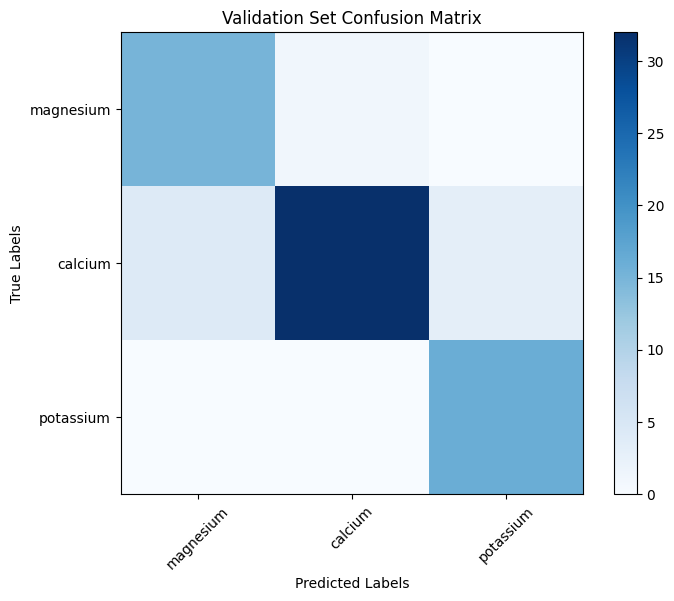

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8191 - loss: 0.4771 
Test Accuracy: 82.98%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Test Set Classification Report:
              precision    recall  f1-score   support

   magnesium       0.69      0.78      0.74        32
     calcium       1.00      0.78      0.87        76
   potassium       0.72      1.00      0.84        33

    accuracy                           0.83       141
   macro avg       0.80      0.85      0.81       141
weighted avg       0.86      0.83      0.83       141



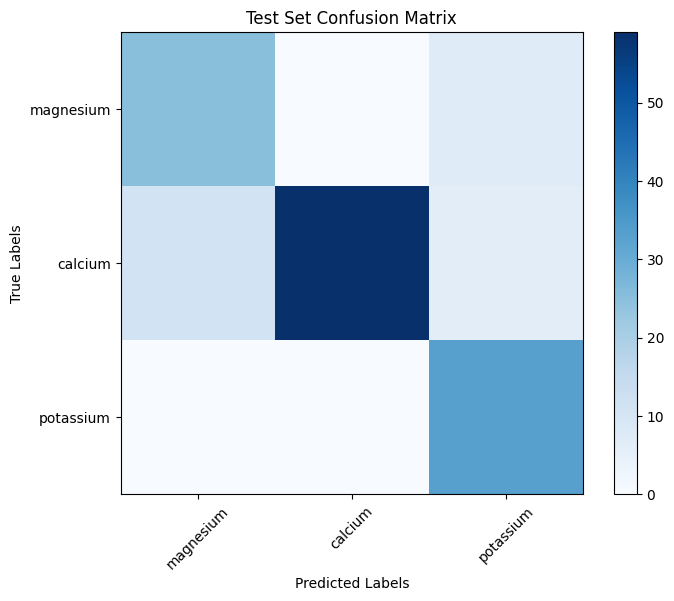

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive

import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/Nutrient Deficient RAW Images of Banana Leaves/'

deficiency_classes = ['magnesium', 'calcium', 'potassium']

# Image parameters
img_size = (224, 224)

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation only for the training set
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    brightness_range=[1.0, 1.2],  # Adjust brightness
    horizontal_flip=True          # Flip left-right
)

# No augmentation for validation and test sets
datagen_val_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create separate generators for training, validation, and test sets
data_generator = datagen_val_test.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    shuffle=False
)

# Extract features and labels from the generator
def extract_features(generator):
    features, labels = [], []
    for batch_images, batch_labels in generator:
        feature_batch = model.predict(batch_images)
        features.append(feature_batch)
        labels.append(batch_labels)
        if generator.batch_index == len(generator) - 1:
            break
    return np.vstack(features), np.vstack(labels)

# Extract features from the dataset
features, labels = extract_features(data_generator)

# Stratified split into train (70%), test (20%), and validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, stratify=y_temp, random_state=42)  # 0.333 to make 10% of total

# Apply data augmentation only to training images (before feature extraction)
train_generator = datagen_train.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    subset='training',
    shuffle=True
)

# Extract augmented training features and labels
X_train_aug, y_train_aug = extract_features(train_generator)

# Build the classifier
classifier = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape=(X_train_aug.shape[1],)),
    Dropout(0.5),
    Dense(len(deficiency_classes), activation='softmax')
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier.fit(X_train_aug, y_train_aug, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Validation Accuracy
val_loss, val_accuracy = classifier.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Validation Set Classification Report
y_val_pred = classifier.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

print("\nValidation Set Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=deficiency_classes))

# Validation Set Confusion Matrix
val_conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(val_conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Validation Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(deficiency_classes)), deficiency_classes, rotation=45)
plt.yticks(np.arange(len(deficiency_classes)), deficiency_classes)
plt.show()

# Test Accuracy
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Test Set Classification Report and Confusion Matrix
y_test_pred = classifier.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

print("\nTest Set Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=deficiency_classes))

conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(deficiency_classes)), deficiency_classes, rotation=45)
plt.yticks(np.arange(len(deficiency_classes)), deficiency_classes)
plt.show()


Mounted at /content/drive
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 426 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Found 426 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4922 - loss: 1.8662 - val_accuracy: 0.6667 - val_loss: 0.9288
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7290 - loss: 0.7382 - val_accuracy: 0.8095 - val_loss: 0.4294
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7577 - loss: 0.6104 - val_accuracy: 0.8810 - val_loss: 0.3378
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7739 - loss: 0.5330 - val_accuracy: 0.9286 - val_loss: 0.2148
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8566 - loss: 0.3565 - val_accuracy: 0.9048 - val_loss: 0.2582
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8497 - loss: 0.3289 - val_accuracy: 0.9048 - val_loss: 0.1683
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9294 - loss: 0.2075 - val_accuracy: 0.9286 - val_loss: 0.1592
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9199 - loss: 0.2019 - val_accuracy: 0.9286 - val_loss: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Training Set Classification Report:
              precision    recall  f1-score   support

        iron       0.96      0.95      0.95        74
   magnesium       0.97      0.97      0.97       153
   potassium       0.99      0.99      0.99       189

    accuracy                           0.98       416
   macro avg       0.97      0.97      0.97       416
weighted avg       0.98      0.98      0.98       416



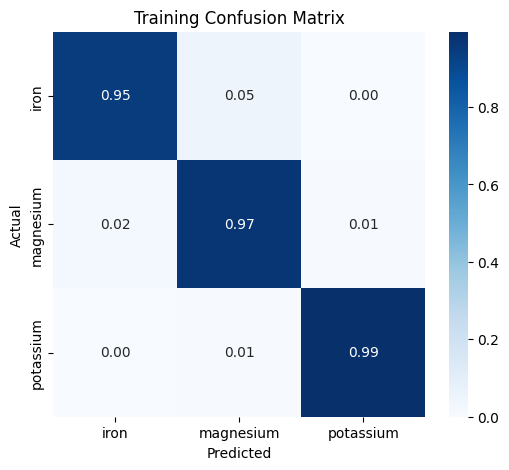

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9474 - loss: 0.1388
Validation Accuracy: 95.24%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Validation Set Classification Report:
              precision    recall  f1-score   support

        iron       1.00      0.75      0.86         8
   magnesium       0.89      1.00      0.94        16
   potassium       1.00      1.00      1.00        18

    accuracy                           0.95        42
   macro avg       0.96      0.92      0.93        42
weighted avg       0.96      0.95      0.95        42



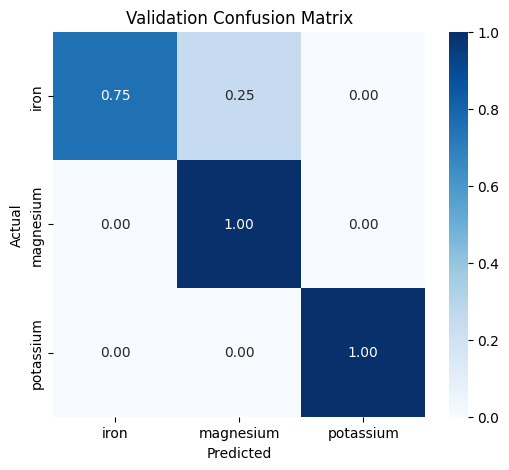

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9546 - loss: 0.1226
Test Accuracy: 96.39%
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Test Set Classification Report:
              precision    recall  f1-score   support

        iron       0.93      0.93      0.93        15
   magnesium       0.97      0.94      0.95        32
   potassium       0.97      1.00      0.99        36

    accuracy                           0.96        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.96      0.96      0.96        83



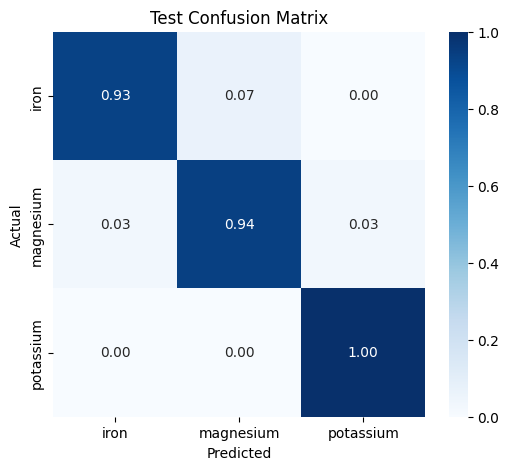

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive

import numpy as np
import random
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/Nutrient Deficient RAW Images of Banana Leaves/'

deficiency_classes = ['iron', 'magnesium', 'potassium']

# Image parameters
img_size = (224, 224)

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation only for the training set
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    brightness_range=[1.0, 1.2],  # Adjust brightness
    horizontal_flip=True          # Flip left-right
)

datagen_val_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create separate generators for training, validation, and test sets
data_generator = datagen_val_test.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    shuffle=False
)

# Extract features and labels from the generator
def extract_features(generator):
    features, labels = [], []
    for batch_images, batch_labels in generator:
        feature_batch = model.predict(batch_images)
        features.append(feature_batch)
        labels.append(batch_labels)
        if generator.batch_index == len(generator) - 1:
            break
    return np.vstack(features), np.vstack(labels)

# Extract features from the dataset
features, labels = extract_features(data_generator)

# Stratified split into train (70%), test (20%), and validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, stratify=y_temp, random_state=42)

# Apply data augmentation only to training images (before feature extraction)
train_generator = datagen_train.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    subset='training',
    shuffle=True
)

# Extract augmented training features and labels
X_train_aug, y_train_aug = extract_features(train_generator)

# Build the classifier
classifier = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape=(X_train_aug.shape[1],)),
    Dropout(0.5),
    Dense(len(deficiency_classes), activation='softmax')
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier.fit(X_train_aug, y_train_aug, validation_data=(X_val, y_val), epochs=10, batch_size=32)

classifier.save("banana_model.h5")

# Function to plot a confusion matrix with color intensity based on correct classifications
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix (convert counts to percentages)
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=deficiency_classes, yticklabels=deficiency_classes)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{title} Confusion Matrix')
    plt.show()


# Training Accuracy
y_train_pred = classifier.predict(X_train_aug)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train_aug, axis=1)

print("\nTraining Set Classification Report:")
print(classification_report(y_train_true_classes, y_train_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_train_true_classes, y_train_pred_classes, "Training")

# Validation Accuracy
val_loss, val_accuracy = classifier.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_val_pred = classifier.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

print("\nValidation Set Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_val_true_classes, y_val_pred_classes, "Validation")

# Test Accuracy
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_test_pred = classifier.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

print("\nTest Set Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_test_true_classes, y_test_pred_classes, "Test")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 240 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Found 240 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3889 - loss: 1.6485 - val_accuracy: 0.6522 - val_loss: 0.6373
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7422 - loss: 0.6003 - val_accuracy: 0.7391 - val_loss: 0.8380
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7651 - loss: 0.6059 - val_accuracy: 0.7826 - val_loss: 0.4099
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7897 - loss: 0.4346 - val_accuracy: 0.7826 - val_loss: 0.4154
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8218 - loss: 0.4059 - val_accuracy: 0.7826 - val_loss: 0.4422
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8145 - loss: 0.3935 - val_accuracy: 0.8261 - val_loss: 0.3224
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8647 - loss: 0.2911 - val_accuracy: 0.8696 - val_loss: 0.2776
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8785 - loss: 0.2726 - val_accuracy: 0.8696 - val_loss: 0.2798
Epoch 9/10


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Training Set Classification Report:
              precision    recall  f1-score   support

     iron-Fe       0.87      0.98      0.93        63
magnesium-Mg       0.98      0.88      0.93        73
  potasium-K       1.00      1.00      1.00        88

    accuracy                           0.96       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.96      0.96      0.96       224



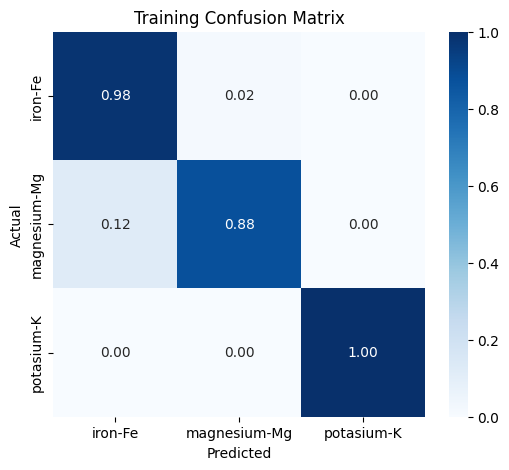

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8696 - loss: 0.2152
Validation Accuracy: 86.96%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Validation Set Classification Report:
              precision    recall  f1-score   support

     iron-Fe       0.78      1.00      0.88         7
magnesium-Mg       0.86      0.75      0.80         8
  potasium-K       1.00      0.88      0.93         8

    accuracy                           0.87        23
   macro avg       0.88      0.88      0.87        23
weighted avg       0.88      0.87      0.87        23



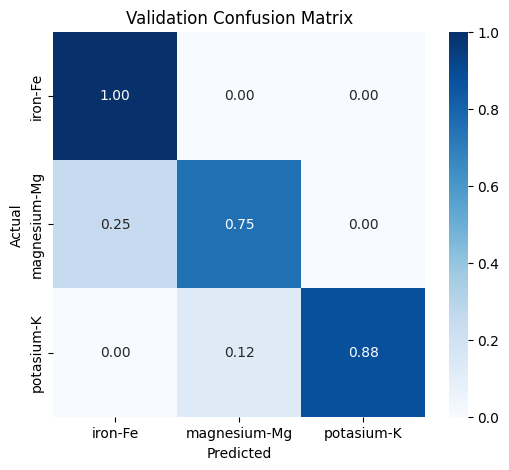

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9451 - loss: 0.1528
Test Accuracy: 93.33%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Test Set Classification Report:
              precision    recall  f1-score   support

     iron-Fe       0.86      0.92      0.89        13
magnesium-Mg       0.93      0.88      0.90        16
  potasium-K       1.00      1.00      1.00        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



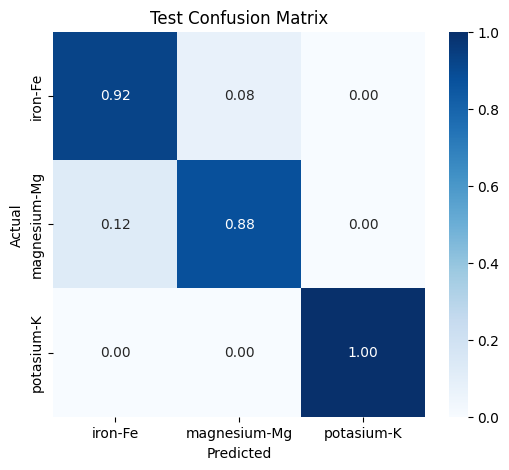

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive

import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/coffee dataset/CoLeaf DATASET/'

deficiency_classes = ['iron-Fe', 'magnesium-Mg', 'potasium-K']

# Image parameters
img_size = (224, 224)

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation only for the training set
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    brightness_range=[1.0, 1.2],  # Adjust brightness
    horizontal_flip=True          # Flip left-right
)

datagen_val_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create separate generators for training, validation, and test sets
data_generator = datagen_val_test.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    shuffle=False
)

# Extract features and labels from the generator
def extract_features(generator):
    features, labels = [], []
    for batch_images, batch_labels in generator:
        feature_batch = model.predict(batch_images)
        features.append(feature_batch)
        labels.append(batch_labels)
        if generator.batch_index == len(generator) - 1:
            break
    return np.vstack(features), np.vstack(labels)

# Extract features from the dataset
features, labels = extract_features(data_generator)

# Stratified split into train (70%), test (20%), and validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, stratify=y_temp, random_state=42)

# Apply data augmentation only to training images (before feature extraction)
train_generator = datagen_train.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    subset='training',
    shuffle=True
)

# Extract augmented training features and labels
X_train_aug, y_train_aug = extract_features(train_generator)

# Build the classifier
classifier = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape=(X_train_aug.shape[1],)),
    Dropout(0.5),
    Dense(len(deficiency_classes), activation='softmax')
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier.fit(X_train_aug, y_train_aug, validation_data=(X_val, y_val), epochs=10, batch_size=32)

classifier.save("coffee_model.h5")

# Function to plot a confusion matrix with color intensity based on correct classifications
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix (convert counts to percentages)
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=deficiency_classes, yticklabels=deficiency_classes)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{title} Confusion Matrix')
    plt.show()


# Training Accuracy
y_train_pred = classifier.predict(X_train_aug)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train_aug, axis=1)

print("\nTraining Set Classification Report:")
print(classification_report(y_train_true_classes, y_train_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_train_true_classes, y_train_pred_classes, "Training")

# Validation Accuracy
val_loss, val_accuracy = classifier.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_val_pred = classifier.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

print("\nValidation Set Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_val_true_classes, y_val_pred_classes, "Validation")

# Test Accuracy
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_test_pred = classifier.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

print("\nTest Set Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_test_true_classes, y_test_pred_classes, "Test")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive

import numpy as np
import seaborn as sns
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/rice_plant_lacks_nutrients'

deficiency_classes = ['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)']

# Image parameters
img_size = (224, 224)

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation only for the training set
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    brightness_range=[1.0, 1.2],  # Adjust brightness
    horizontal_flip=True          # Flip left-right
)

datagen_val_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create separate generators for training, validation, and test sets
data_generator = datagen_val_test.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    shuffle=False
)

# Extract features and labels from the generator
def extract_features(generator):
    features, labels = [], []
    for batch_images, batch_labels in generator:
        feature_batch = model.predict(batch_images)
        features.append(feature_batch)
        labels.append(batch_labels)
        if generator.batch_index == len(generator) - 1:
            break
    return np.vstack(features), np.vstack(labels)

# Extract features from the dataset
features, labels = extract_features(data_generator)

# Stratified split into train (70%), test (20%), and validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, stratify=labels, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, stratify=y_temp, random_state=42)

# Apply data augmentation only to training images (before feature extraction)
train_generator = datagen_train.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    subset='training',
    shuffle=True
)

# Extract augmented training features and labels
X_train_aug, y_train_aug = extract_features(train_generator)

# Build the classifier
classifier = tf.keras.Sequential([
    Dense(512, activation='relu', input_shape=(X_train_aug.shape[1],)),
    Dropout(0.5),
    Dense(len(deficiency_classes), activation='softmax')
])

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier.fit(X_train_aug, y_train_aug, validation_data=(X_val, y_val), epochs=10, batch_size=32)

classifier.save("rice_model.h5")

# Function to plot a confusion matrix with color intensity based on correct classifications
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix (convert counts to percentages)
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=deficiency_classes, yticklabels=deficiency_classes)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{title} Confusion Matrix')
    plt.show()


# Training Accuracy
y_train_pred = classifier.predict(X_train_aug)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_train_true_classes = np.argmax(y_train_aug, axis=1)

print("\nTraining Set Classification Report:")
print(classification_report(y_train_true_classes, y_train_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_train_true_classes, y_train_pred_classes, "Training")

# Validation Accuracy
val_loss, val_accuracy = classifier.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

y_val_pred = classifier.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

print("\nValidation Set Classification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_val_true_classes, y_val_pred_classes, "Validation")

# Test Accuracy
test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_test_pred = classifier.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

print("\nTest Set Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=deficiency_classes))
plot_confusion_matrix(y_test_true_classes, y_test_pred_classes, "Test")


KeyboardInterrupt: 

In [ ]:
print("Feature shape:", features.shape)
print("First 5 feature values:", features[0][:5])  # Check some sample values

print("First 5 pixel values before preprocessing:", img.flatten()[:5])

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

print("Class index order:", classifier.classes_)

In [ ]:
from google.colab import files
files.download("banana_model.h5")
files.download("coffee_model.h5")
files.download("rice_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from google.colab import drive

import numpy as np
import seaborn as sns
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = '/content/drive/My Drive/rice_plant_lacks_nutrients'

deficiency_classes = ['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)']

# Image parameters
img_size = (224, 224)

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(deficiency_classes), activation='softmax')(x)

# Full model
full_model = Model(inputs=base_model.input, outputs=output_layer)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation only for the training set
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    brightness_range=[1.0, 1.2],
    horizontal_flip=True
)

datagen_val_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create separate generators for training, validation, and test sets
data_generator = datagen_val_test.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    classes=deficiency_classes,
    shuffle=False
)

# Train the model
history = full_model.fit(data_generator, epochs=10, batch_size=32)

# Save the entire model
full_model.save("rice_full_model.h5")

print("Model saved successfully as 'rice_full_model.h5'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1165 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 260s 7s/step - accuracy: 0.4098 - loss: 6.7668
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 255s 7s/step - accuracy: 0.6728 - loss: 0.7085
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 252s 7s/step - accuracy: 0.7628 - loss: 0.5609
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 250s 6s/step - accuracy: 0.8555 - loss: 0.3794
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 247s 7s/step - accuracy: 0.8658 - loss: 0.3490
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 259s 7s/step - accuracy: 0.8933 - loss: 0.2942
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 248s 7s/step - accuracy: 0.9279 - loss: 0.2320
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 255s 7s/step - accuracy: 0.9220 - loss: 0.2107
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.9398 - loss: 0.1786
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.9376 - loss: 0.1784


Model saved successfully as 'rice_full_model.h5'


In [ ]:
from google.colab import files
files.download("rice_full_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>